# Week 10 Problem 1

If you are not using the `Assignments` tab on the course JupyterHub server to read this notebook, read [Activating the assignments tab](https://github.com/UI-DataScience/info490-fa16/blob/master/Week2/assignments/README.md).

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do **not** write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select _Kernel_, and restart the kernel and run all cells (_Restart & Run all_).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select _File_ → _Save and CheckPoint_)

5. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

In [1]:
%matplotlib inline

In [2]:
from nose.tools import assert_equal
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_almost_equal, assert_array_equal

# Problem 1.

Write a function that makes two histograms, one each for the `lat` and `long` columns of the `airports` data. Although we will only be using it to plot `lat` and `long`, try to make it general to take other columns as arguments. Use the following guidelines:

1. Use `plt.subplots` to create two axes on which to plot the histogram and make the entire plot 12 by 9
2. Use the [`plot method`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for a pandas dataframe. 
3. Set the xlimits for the plot of col1 to (10,70)
4. Set the xlimits for the plot of col2 to (-180, -40)
5. Plot col1 on ax1 and col2 on ax2
6. Don't share any axes or normalize the data

Here is an example plot:

![Example P1](p1_example.png)

In [3]:
def make_hists(df, col1, col2):
    
    '''
    Makes two histograms for columns of a dataframe, namely the lat and 
    long columns of the airports data
    
    Params
    -------
    df: the dataframe to plot
    col1: the first column to plot
    col2: the second column to plot
    
    Returns
    -------
    A tuple of two matplotlib.axes._subplots.AxesSubplot objects
    
    '''

    #YOUR CODE HERE
    # Make two plots and set the figsize to be 12 by 9.
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 9))
    # Plot lat
    data = pd.DataFrame(df[col1])
    data.plot(kind='hist', ax=ax1, sharex=False, sharey=False, xlim=(10, 70))
    # Plot long
    data = pd.DataFrame(df[col2])
    data.plot(kind='hist', ax=ax2, sharex=False, sharey=False, xlim=(-180, -40))
    return ax1, ax2

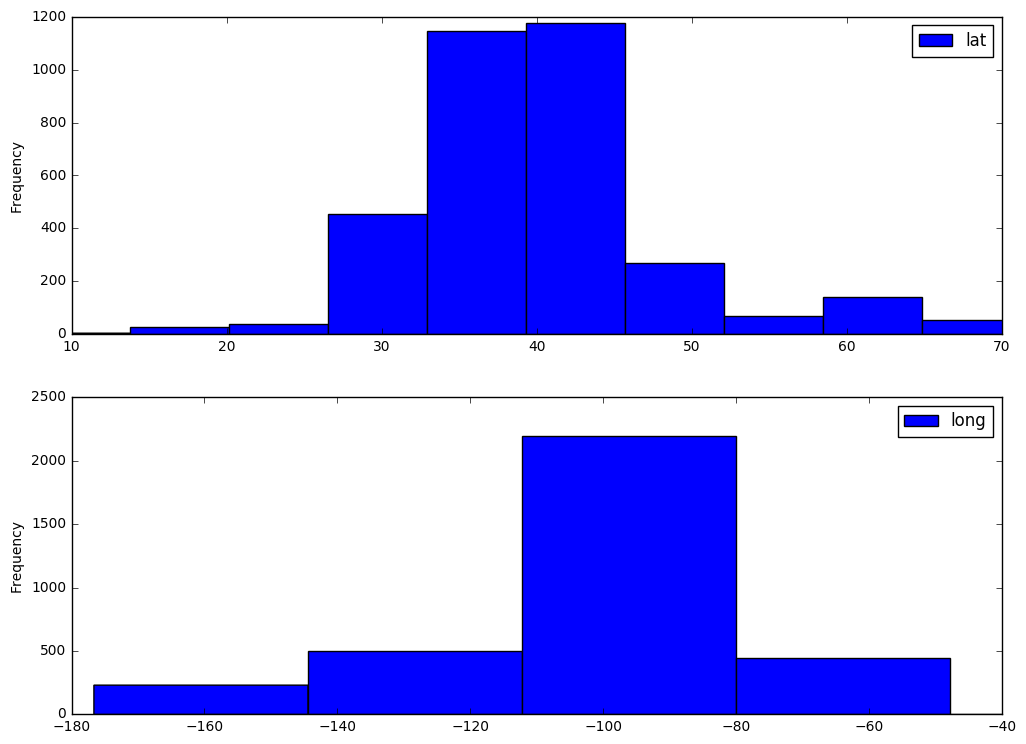

In [4]:
airports = pd.read_csv('/home/data_scientist/data/airports.csv')
_ = make_hists(airports, 'lat', 'long')

In [5]:
# assert tests
airports = pd.read_csv('/home/data_scientist/data/airports.csv')

axes = make_hists(airports, 'lat', 'long')

lathist = axes[0]
longhist = axes[1]

# is the data in the plot right? are the axis limits right?
assert_almost_equal(lathist.dataLim, [[7.367222, 0.0], [71.2854475, 1176.0]])
assert_almost_equal(longhist.dataLim, [[-176.6460306, 0.0], [145.621384, 2195.0]])

# height and width tests
assert_equal(lathist.get_figure().get_figwidth(), 12.0)
assert_equal(lathist.get_figure().get_figheight(), 9.0)

# plt.savefig('p1_example.png')

plt.close()

# Problem 2.

This time make a single scatterplot with col1 (lat) on the y axis and col2 (long) on the x axis. Make this plot 12 by 6 and again use the plot method of a dataframe, but don't set the x or y limits. 

![Example P2](p2_example.png)

In [6]:
def make_scatter(df, col1, col2):
    
    '''
    Makes a scatterplot for columns of a dataframe, namely the lat and 
    long columns of the airports data
    
    Params
    -------
    df: the dataframe to plot
    col1: the column to plot on the y axis
    col2: the column to plot on the x axis
    
    Returns
    -------
    A matplotlib.axes._subplots.AxesSubplot object
    
    '''

    #YOUR CODE HERE
    # Plot the scatter
    ax = df.plot(kind='scatter', y=col1, x=col2, figsize=(12, 6))
    # Add titile
    ax.set_title('Latitudes and Longitudes of US Airports')
    return ax

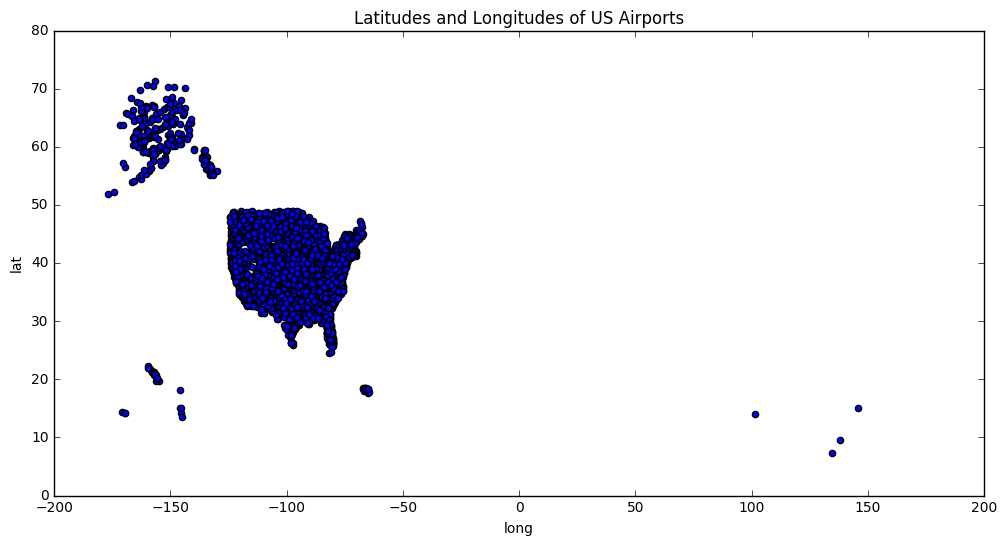

In [7]:
_ = make_scatter(airports, 'lat', 'long')

In [8]:
# assert tests
airports = pd.read_csv('/home/data_scientist/data/airports.csv')
p2_ax = make_scatter(airports, 'lat', 'long')

# are the data limits correct?
assert_almost_equal(p2_ax.dataLim, [[-176.6490360677117, 7.361211064576615], [145.62438946771172, 71.29145843542341]], decimal=0)

# height and width tests
assert_equal(p2_ax.get_figure().get_figwidth(), 12.0)
assert_equal(p2_ax.get_figure().get_figheight(), 6.0)

# plt.savefig('p2_example.png')

plt.close()

What are those points to the bottom right? They are certainly *outliers*, but are they due to measurement error? What about errors in the data or code used to produce the plot? Ponder this question and ask yourself how it could be solved through domain knowledge.

# Problem 3.

Now that we've seen the data, we'll shift into creating some summary statistics. Write a function that takes a pandas series and returns a [five-number summary](https://en.wikipedia.org/wiki/Five-number_summary). Your output should be a tuple with 5 elements in the following form:

`(minimum, 25th percentile, median, 75th percentile, maximum)`

In [9]:
def five_number_summary(series):
    
    '''
    Produces a five-number summary for a Pandas Series.
    
    Params
    -------
    series: a Pandas Series
    
    Returns
    -------
    A 5-tuple consisting of the min, 25Q, median, 75Q, and max, 
    in that order
    
    '''

    #YOUR CODE HERE
    # Compute the minimum
    srsmin = series.min()
    # Compute the 25th percentile
    firstQ = series.quantile(0.25)
    # Compute the median
    srsmedian = series.median()
    # Compute the 75th percentile
    thirdQ = series.quantile(0.75)
    # Compute the maximum
    srsmax = series.max()
    # Cobine the results
    result = (srsmin, firstQ, srsmedian, thirdQ, srsmax)
    
    return result

In [10]:
# assert tests
airports = pd.read_csv('/home/data_scientist/data/airports.csv')

fns_lat = five_number_summary(airports.lat)
fns_lon = five_number_summary(airports.long)

assert_equal(type(fns_lat), tuple)
assert_equal(type(fns_lon), tuple)
assert_equal(len(fns_lat), 5)
assert_equal(len(fns_lon), 5)

assert_almost_equal(fns_lat,
                    [7.3672219999999999, 34.688427154999999,
                      39.434449305000001, 43.372612357500003,
                      71.285447500000004], decimal=2)

assert_almost_equal(fns_lon,
                    [-176.64603059999999, -108.76112075,
                     -93.599425414999999, -84.137518542500004,
                     145.62138400000001], decimal=2)


# Problem 4

In the next two problems we will *gently* introduce the concept of [Bootstrap Resampling][1] for parameter estimation. This concept is closely related to standard errors and confidence intervals from the reading. Consider a situation where we want to know the average latitude and/or longitude of US airports. We can easily calculate this outright, because our data includes the entire population of US airports. But pretend we only have a random sample of 1000 US airports:

[1]: https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

In [11]:
df = pd.read_csv('/home/data_scientist/data/airports.csv')
df = df.sample(1000, random_state = 0)

Now we can still calculate the mean latitude and mean longitude for this sample, but we are not sure how close we can expect this to be to the mean latitude and longitude for **all** US airports.<sup>1</sup> It turns out that if we repeatedly sample our data (`df`) **with replacement** and calculate the mean, we will actually be simulating the [sampling distribution](https://en.wikipedia.org/wiki/Sampling_distribution) of the sample mean. This is basically the *distribution of our mean statistic*, and from that we can easily calculate things like standard error, confidence intervals, etc. for the mean latitude and mean longitude of US airports.


First write a function that takes a Pandas Series and samples it *with replacement*. The sample size should be the same as the length of the series, and it should return another series of the same dimension.

In [12]:
def bootstrap_sample(series):
    
    '''
    Produces a bootstrap sample of a Pandas Series
    
    Params
    -------
    series: a Pandas Series
    random_state: to be passed to the sample method
    
    Returns
    -------
    A Series that is a sample with replacement of the 
    original series (of the same length)
    
    '''

    #YOUR CODE HERE
    # Get the length of series
    n = len(series)
    # Sample with replacement
    result = series.sample(n, replace=True)
    return result

In [13]:
df = pd.read_csv('/home/data_scientist/data/airports.csv')
df = df.sample(1000, random_state = 0)

# are you returning a series
assert_equal(type(bootstrap_sample(df.lat)), pd.Series)
assert_equal(type(bootstrap_sample(df.long)), pd.Series)

# is n correct? is the shape right?
assert_equal(bootstrap_sample(df.lat).shape, (1000,))
assert_equal(bootstrap_sample(df.long).shape, (1000,))

# are you sampling with replacement
assert(len(bootstrap_sample(df.lat).unique()) < len(df.lat.unique()))
assert(len(bootstrap_sample(df.long).unique()) < len(df.long.unique()))

# are all the items of the sample contained in the original data?
assert(set(bootstrap_sample(df.lat).unique()).issubset(set(df.lat)))
assert(set(bootstrap_sample(df.long).unique()).issubset(set(df.long)))

# Problem 5

Now you want to repeatedly generate bootstrap samples and calculate the mean. In this function, generate a bootstrap sample of a series and take the mean. Do this `num_times` and store the results in a Pandas Series. You should generate a new bootstrap sample each time you calculate the mean, and your result should be of length `num_times`. If you do this correctly, you'll produce data that looks normally distributed. To be clear, here is the algorithm (though not necessarily how you must write your code):

```
for i in 1:num_times:
    generate a bootstrap sample of series
    calculate the mean of that bootstrap sample
    store the mean in the result series
```

In [14]:
def bootstrap_mean(series, num_times = 1000):
    
    '''
    Produces a sampling distribution of the sample mean of a 
    Pandas Series
    
    Params
    -------
    series: a Pandas Series
    num_times: the number of iterations to run
    
    Returns
    -------
    A Series that is of length num_times with each entry being the mean
    of a bootstrap sample of series
    '''
    
    #YOUR CODE HERE
    # Use list comprehension to caculate the mean of each sample, then turn the list to a pandas Series
    result = pd.Series([bootstrap_sample(series).mean() for i in range(num_times)])
    return result

In [15]:
df = pd.read_csv('/home/data_scientist/data/airports.csv')
df = df.sample(1000, random_state = 0)

sampling_dist_of_mean_lat = bootstrap_mean(df.lat)
sampling_dist_of_mean_long = bootstrap_mean(df.long)

# are you returning a series
assert_equal(type(sampling_dist_of_mean_lat), pd.Series)
assert_equal(type(sampling_dist_of_mean_long), pd.Series)

# is n correct? is the shape right?
assert_equal(sampling_dist_of_mean_lat.shape, (1000,))
assert_equal(sampling_dist_of_mean_long.shape, (1000,))

assert_almost_equal(sampling_dist_of_mean_lat.describe().values[[0,1,2]], 
                    [1000, 40.103375, 0.271926], decimal=0)

assert_almost_equal(sampling_dist_of_mean_long.describe().values[[0,1,2]], 
                    [1000, -99.951699, 0.698565], decimal=0)

## Plotting

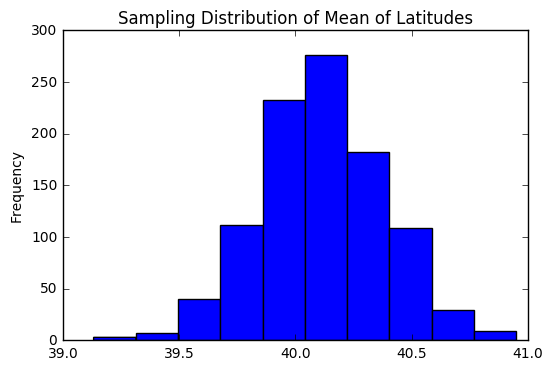

In [16]:
sampling_dist_of_mean_lat.plot(kind='hist', 
                               title='Sampling Distribution of Mean of Latitudes')
plt.show()

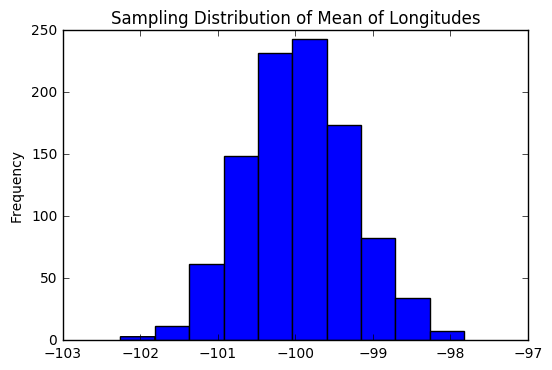

In [17]:
sampling_dist_of_mean_long.plot(kind='hist', 
                                title='Sampling Distribution of Mean of Longitudes')
plt.show()

Notice that regardless of the underlying distribution of the data the mean appears to be normally distributed.

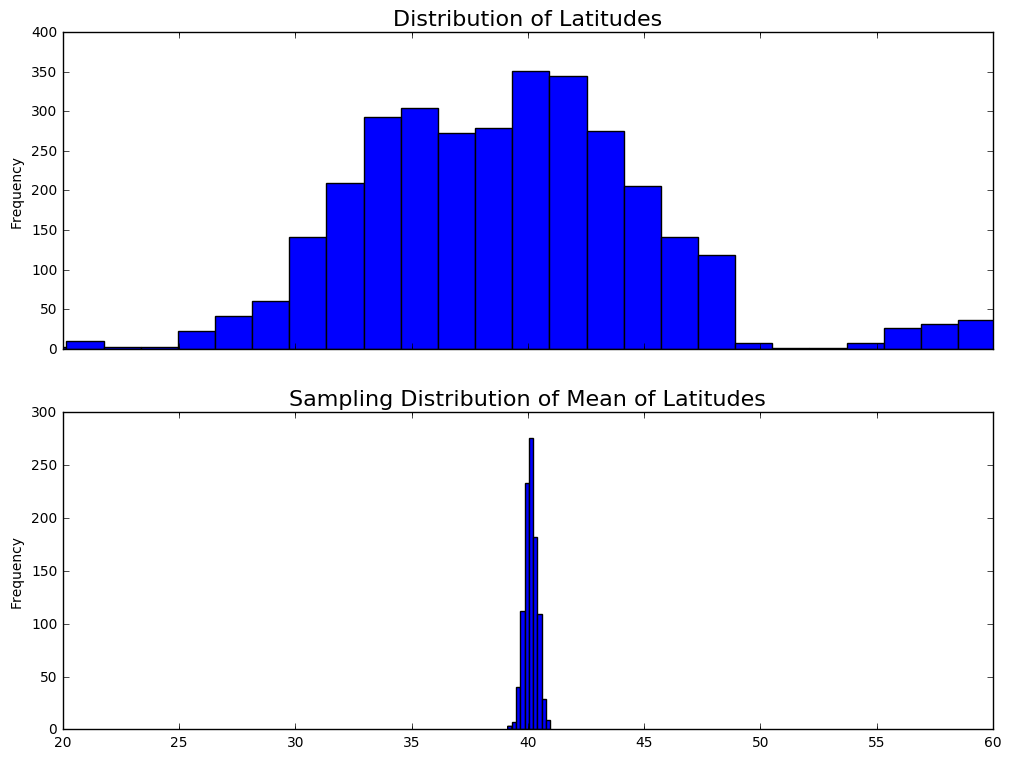

In [18]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,9))
airports.lat.plot(kind='hist', ax=ax1, xlim=(20,60), bins=40)
sampling_dist_of_mean_lat.plot(kind='hist', ax =ax2)
ax1.set_title('Distribution of Latitudes', size=16)
ax2.set_title('Sampling Distribution of Mean of Latitudes', size=16)
plt.show()

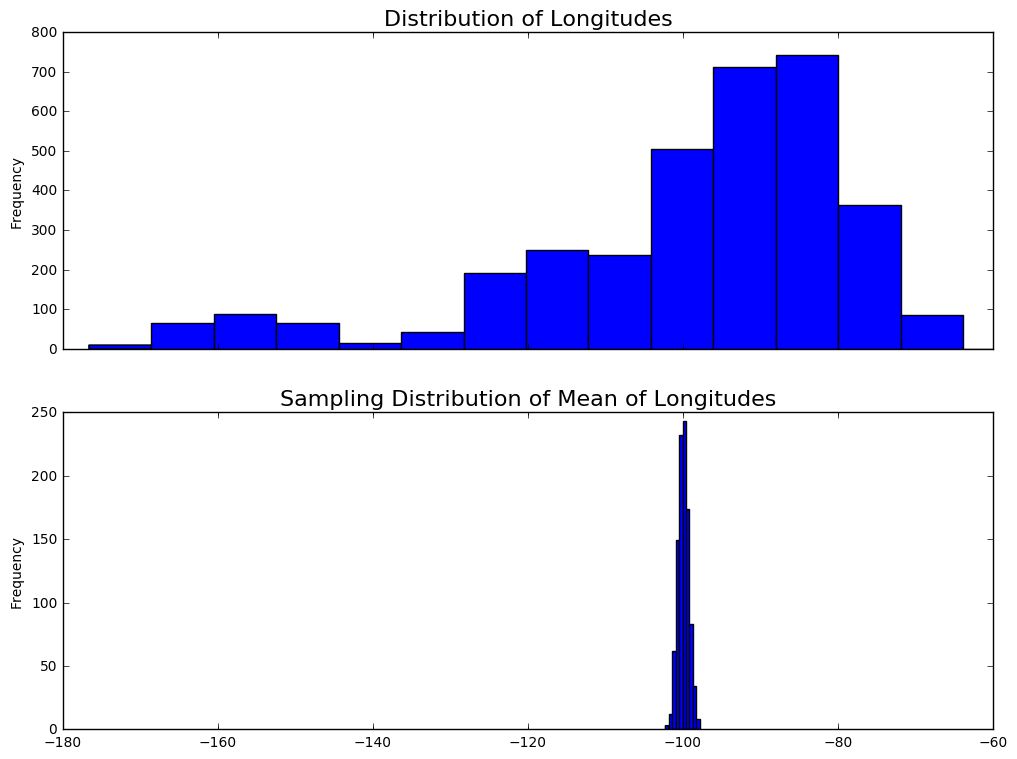

In [19]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,9))
airports.long.plot(kind='hist', ax=ax1, xlim=(-180, -60), bins=40)
sampling_dist_of_mean_long.plot(kind='hist', ax =ax2)
ax1.set_title('Distribution of Longitudes', size=16)
ax2.set_title('Sampling Distribution of Mean of Longitudes', size=16)
plt.show()

<sup>1</sup> Technically, the mean is always normally distributed for a large sample due to Central Limit Theorem and the mean and variance of that normal distribution can be calculated from the sample, but pretend we don't know that.